In [4]:
# Définition d'anneaux de polynômes univariés sur des corps finis pour des tests (rajouter les autres corps pq pas les extensions?)
Ring_A.<x> = PolynomialRing(GF(2))
Ring_B.<x> = PolynomialRing(GF(3))
Ring_C.<x> = PolynomialRing(GF(5))
Ring_D.<x> = PolynomialRing(GF(2^2))
Ring_E.<x> = PolynomialRing(GF(3^2))
Ring_F.<x> = PolynomialRing(GF(5^2))

# Définition de matrices à coefficients dans les anneaux de polynômes pour des tests.

Matrix_A = Matrix(Ring_A, [[1, 0, 1, 1],
                           [x, 1, 1+x, 0],
                           [1, x^2+x^3, x, 0],
                           [x^2, 0, x^3+x^4, 0]])

Vector_s = vector(ZZ, [1, 0, 0, 1])

In [5]:
def row_degree(M):
    """
    Calcule le degré maximal des polynômes de chaque ligne d'une matrice M.

    Arguments :
    M -- une matrice dont les entrées sont des polynômes

    Retourne :
    Une matrice 1 × r contenant les degrés maximaux de chaque ligne.
    """
    r = M.nrows()  # Nombre de lignes
    c = M.ncols()  # Nombre de colonnes

    # Création d'une matrice 1 x r pour stocker les degrés maximaux
    row_degree = Matrix(ZZ, 1, r)

    # Parcours des lignes pour trouver le degré maximal de chaque ligne
    for i in range(r):
        row_degree[0, i] = max(M[i, j].degree() for j in range(c))  # Calcul du degré max de la ligne i

    return row_degree

def shifted_row_degree(M, s):
    """
    Calcule le degré maximal des polynômes de chaque ligne d'une matrice M, en appliquant un décalage spécifique à chaque ligne.

    Arguments :
    M -- une matrice dont les entrées sont des polynômes
    s -- un vecteur contenant les valeurs de décalage (shift) pour chaque ligne

    Retourne :
    Une matrice 1 × r contenant les degrés maximaux de chaque ligne après application du décalage.
    """
    r = M.nrows()  # Nombre de lignes
    c = M.ncols()  # Nombre de colonnes

    # Création d'une matrice 1 x r pour stocker les degrés maximaux
    shifted_row_degree = Matrix(ZZ, 1, r)

    # Parcours des lignes pour trouver le degré maximal de chaque ligne
    for i in range(r):
        shifted_row_degree[0, i] = max((M[i, j].degree()+s[j]) for j in range(c))  # Calcul du degré max de la ligne i

    return shifted_row_degree    

In [6]:
row_degree(Matrix_A)
shifted_row_degree(Matrix_A, Vector_s)

[1 2 3 4]

In [8]:
latex(row_degree(Matrix_A))

\left(\begin{array}{rrrr}
0 & 1 & 3 & 4
\end{array}\right)

In [21]:
M = Matrix(QQ, [[3, 1, 1],
                [1, 2, 4],
                [2, 3, 4]])

def proj(v, w):
    return (v * w) / (v * v) * v

def Gram_Schmidt(B):
    n = B.nrows()
    
    B_star = Matrix(QQ, n, n)
    U = identity_matrix(QQ, n)

    B_star[0] = B[0]
    
    for k in range(1, n):
        B_star[k] = B[k]
        for j in range(k):g
            U[k, j] = (B[k] * B_star[j]) / (B_star[j] * B_star[j])
            B_star[k] -= U[k, j]*B_star[j]
    return U, B_star

(U_M, M_star) = Gram_Schmidt(M)

print("Matrice des coefficients U :")
print(U_M)

print("Matrice réduite B* :")
print(M_star)

print("test")
print(U_M*M_star)


Matrice des coefficients U :
[    1     0     0]
[ 9/11     1     0]
[13/11 49/50     1]
Matrice réduite B* :
[     3      1      1]
[-16/11  13/11  35/11]
[ -3/25  33/50  -3/10]
test
[3 1 1]
[1 2 4]
[2 3 4]


In [11]:
#je vais essayer de faire un algo pour représenter un réseau en 2D avec la base donnée

#entrée : une base du réseau

#sortie : un affichage du reseau euclidien
L=Matrix(ZZ, [[-1,1],
              [3,4]])

def draw_2D_lattice(L, show_basis=False, save=False, name="graphic", show_GS=False):
    """
    Fonction pour dessiner un réseau 2D à partir d'une base donnée.

    Paramètres :
    - L : Matrice 2x2 représentant la base du réseau.
    - save : Booléen indiquant s'il faut enregistrer l'image générée.
    - name : Nom du fichier si l'enregistrement est activé.
    - show_basis : Booléen pour afficher la base ou non

    Affiche le réseau sous forme de points rouges et ajoute une grille pour
    faciliter la lecture de la structure du réseau.
    """

    graphic = Graphics()

    N=7

    #dessin du grillage derriere
    for x in range(-N, N+1):
        graphic += line([(x, -N), (x, N)], color='black', thickness=0.4)
        graphic += line([(-N, x), (N, x)], color='black', thickness=0.4)

    graphic += points([(L[0][0] * i + L[1][0]*j,
                        L[0][1] * i + L[1][1]*j) 
                       for i in range(-2*N, 2*N)
                       for j in range(-2*N, 2*N) 
                       if N>=L[0][0]*i+L[1][0]*j>=-N and -N<=L[0][1]*i+L[1][1]*j<=N],
                      color='red', size=30)

    if(show_basis):
        graphic += arrow((0, 0), (L[0][0], L[0][1]), color='blue', width=1)
        graphic += arrow((0, 0), (L[1][0], L[1][1]), color='blue', width=1)

    if(show_GS):
        L_star = Gram_Schmidt(L)
        graphic += arrow((0, 0), (L_star[0][0], L_star[0][1]), color='green', width=1)
        graphic += arrow((0, 0), (L_star[1][0], L_star[1][1]), color='green', width=1)
        

    p = plot(graphic)

    p.show(axes=False, aspect_ratio=1)
    if(save):
        p.save(name+".png", dpi=300, axes=False, aspect_ratio=1)

In [12]:
L=Matrix(ZZ, [[1, 4, 9],
              [-1, -8, -1],
              [9, 8, 7]])

def draw_3D_lattice(L):
    graphic = Graphics()

    for i in range(10):
        graphic += points([(L[0][0] * i + L[0][1] * j + L[0][2] * k, 
                            L[1][0] * i + L[1][1] * j + L[1][2] * k,  
                            L[2][0] * i + L[2][1] * j + L[2][2] * k) 
                           for i in range(-12, 12) 
                           for j in range(-12, 12) 
                           for k in range(-12, 12) 
                           if 13>=L[0][0] * i + L[0][1] * j + L[0][2] * k>=0 and 0<=L[1][0] * i + L[1][1] * j + L[1][2] * k<=13 and 0<=L[2][0] * i + L[2][1] * j + L[2][2] * k<=13], color='red', size=30)

    p = plot(graphic)

    p.show(axes=False, aspect_ratio=1)

In [13]:
draw_3D_lattice(L)

Graphics3d Object

In [14]:
import random

def random_lattice(d, coeff_range=(-10, 10)):
    """
    Génère une base aléatoire d'un réseau euclidien en dimension d.

    Paramètres :
    - d : Dimension du réseau.
    - coeff_range : Tuple (min, max) définissant l'intervalle des coefficients.

    Retourne :
    - Une matrice inversible aléatoire dxd sur ZZ.
    """
    while True:
        L = Matrix(ZZ, [[random.randint(coeff_range[0], coeff_range[1]) for _ in range(d)] for _ in range(d)])
        if L.det() != 0:  # Vérifie que la matrice est inversible
            return L




La base du réseau : 
[ 1 -1]
[-2  1]
[  1.00000000000000  -1.00000000000000]
[-0.500000000000000 -0.500000000000000]


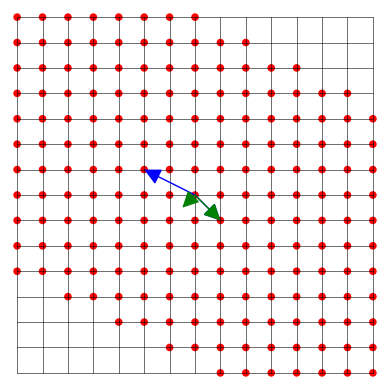

In [15]:
#L = random_lattice(2, (-5, 5))
#L=Matrix(ZZ, [[1, 0],[0, 1]])
L=Matrix(ZZ, [[1, -1],[-2, 1]])
print("La base du réseau : ")
print(L)

print(Gram_Schmidt(L))


draw_2D_lattice(L, save=False, show_basis=True, show_GS=True)

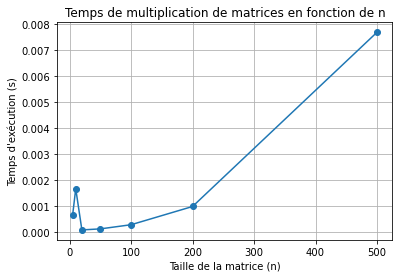

In [16]:
import time
import matplotlib.pyplot as plt

# Fonction pour générer une matrice aléatoire et mesurer le temps de multiplication
def mesure_temps_multiplication(n):
    A = random_matrix(GF(7), n, n)  # Matrice aléatoire dans les rationnels
    B = random_matrix(GF(7), n, n)
    
    start_time = time.time()
    C = A * B  # Multiplication des matrices
    end_time = time.time()
    
    return end_time - start_time  # Temps d'exécution en secondes

# Tester plusieurs tailles de matrices
tailles = [5, 10, 20, 50, 100, 200, 500]  # Tailles de matrices à tester
temps = [mesure_temps_multiplication(n) for n in tailles]

# Affichage des résultats
plt.plot(tailles, temps, marker='o', linestyle='-')
plt.xlabel("Taille de la matrice (n)")
plt.ylabel("Temps d'exécution (s)")
plt.title("Temps de multiplication de matrices en fonction de n")
plt.grid(True)
plt.show()


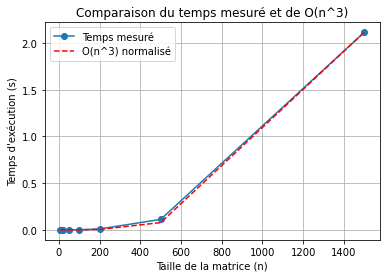

In [17]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour générer une matrice aléatoire et mesurer le temps de multiplication
def mesure_temps_multiplication(n):
    A = random_matrix(QQ, n, n)  # Matrice aléatoire dans les rationnels
    B = random_matrix(QQ, n, n)
    
    start_time = time.time()
    C = A * B  # Multiplication des matrices
    end_time = time.time()
    
    return end_time - start_time  # Temps d'exécution en secondes

# Tester plusieurs tailles de matrices
tailles = [5, 10, 20, 50, 100, 200, 500, 1500]  # Tailles de matrices à tester
temps = [mesure_temps_multiplication(n) for n in tailles]

# Normalisation pour la courbe de référence (éviter des valeurs trop grandes)
facteur_norm = temps[-1] / (tailles[-1] ** 3)  # On normalise pour faire coller à la dernière valeur

# Courbe théorique (O(n^3))
temps_theorique = [facteur_norm * (n ** 3) for n in tailles]

# Affichage des résultats
plt.plot(tailles, temps, marker='o', linestyle='-', label="Temps mesuré")
plt.plot(tailles, temps_theorique, linestyle='--', color='red', label="O(n^3) normalisé")

plt.xlabel("Taille de la matrice (n)")
plt.ylabel("Temps d'exécution (s)")
plt.title("Comparaison du temps mesuré et de O(n^3)")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
latex(Matrix(ZZ, [[1, 0],[0, 1]]))


\left(\begin{array}{rr}
1 & 0 \\
0 & 1
\end{array}\right)